# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


In [9]:
#Set the API base URL
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key
#url

In [10]:
   # Create endpoint URL with each city
city_url = url + "&q="+ cities[0]
city_url
city1 = requests.get(city_url).json()
city1


{'coord': {'lon': -42.2331, 'lat': -15.8078},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 285.21,
  'feels_like': 284.98,
  'temp_min': 285.21,
  'temp_max': 285.21,
  'pressure': 1022,
  'humidity': 96,
  'sea_level': 1022,
  'grnd_level': 926},
 'visibility': 10000,
 'wind': {'speed': 0.84, 'deg': 89, 'gust': 0.86},
 'clouds': {'all': 0},
 'dt': 1686209564,
 'sys': {'country': 'BR', 'sunrise': 1686215500, 'sunset': 1686255867},
 'timezone': -10800,
 'id': 3447059,
 'name': 'Taiobeiras',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiobeiras
Processing Record 2 of Set 1 | la passe
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | hadibu
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | novoaltaysk
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | marsabit
Processing Record 11 of Set 1 | berdigestyakh
Processing Record 12 of Set 1 | terme
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | alotau
City not found. Skipping...
Processing Record 15 of Set 1 | funadhoo
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | mamuju
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | pallasovka
Processing Record 20 of Set 1 | kemer
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | broken 

Processing Record 40 of Set 4 | pangody
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | whitehorse
Processing Record 44 of Set 4 | bredasdorp
Processing Record 45 of Set 4 | acajutla
Processing Record 46 of Set 4 | sishilichengzi
City not found. Skipping...
Processing Record 47 of Set 4 | san jose village
City not found. Skipping...
Processing Record 48 of Set 4 | aykhal
Processing Record 49 of Set 4 | mount pleasant
Processing Record 0 of Set 5 | badger
Processing Record 1 of Set 5 | jamjamal
Processing Record 2 of Set 5 | tazacorte
Processing Record 3 of Set 5 | salahonda
Processing Record 4 of Set 5 | mossel bay
Processing Record 5 of Set 5 | arauco
Processing Record 6 of Set 5 | sinjai
Processing Record 7 of Set 5 | gisborne
Processing Record 8 of Set 5 | port saint john's
Processing Record 9 of Set 5 | sao felix do xingu
Processing Record 10 of Set 5 | el jadid
Processing Record 11 of Set 5 | rongelap
Processing Rec

Processing Record 32 of Set 8 | uray
Processing Record 33 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 34 of Set 8 | sinabang
Processing Record 35 of Set 8 | berck-plage
Processing Record 36 of Set 8 | hasaki
Processing Record 37 of Set 8 | ambalavao
Processing Record 38 of Set 8 | gebeit
Processing Record 39 of Set 8 | hun
Processing Record 40 of Set 8 | ginir
Processing Record 41 of Set 8 | lautoka
Processing Record 42 of Set 8 | calahorra
Processing Record 43 of Set 8 | kenai
Processing Record 44 of Set 8 | brookings
Processing Record 45 of Set 8 | suva
Processing Record 46 of Set 8 | ylitornio
Processing Record 47 of Set 8 | siverskiy
Processing Record 48 of Set 8 | saint-pierre
Processing Record 49 of Set 8 | san borja
Processing Record 0 of Set 9 | saint-denis
Processing Record 1 of Set 9 | 'ibri
City not found. Skipping...
Processing Record 2 of Set 9 | gadzhiyevo
Processing Record 3 of Set 9 | fougamou
Processing Record 4 of Set 9 | glace bay
Processing R

Processing Record 22 of Set 12 | nyurba
Processing Record 23 of Set 12 | antsiranana
Processing Record 24 of Set 12 | bengkulu
Processing Record 25 of Set 12 | laughlin
Processing Record 26 of Set 12 | saint-pierre-d'oleron
City not found. Skipping...
Processing Record 27 of Set 12 | markovo
Processing Record 28 of Set 12 | taltal
Processing Record 29 of Set 12 | midvagur
Processing Record 30 of Set 12 | sanga-sanga
Processing Record 31 of Set 12 | cambria
Processing Record 32 of Set 12 | kawthoung
City not found. Skipping...
Processing Record 33 of Set 12 | mishkino
Processing Record 34 of Set 12 | sakaiminato
Processing Record 35 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 36 of Set 12 | oxelosund
Processing Record 37 of Set 12 | batticaloa
Processing Record 38 of Set 12 | rio verde de mato grosso
Processing Record 39 of Set 12 | tindouf
Processing Record 40 of Set 12 | oyama
Processing Record 41 of Set 12 | rutland
Processing Record 42 of Set 12 | rondonopolis

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [16]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taiobeiras,-15.8078,-42.2331,12.06,96,0,0.84,BR,1686209569
1,la passe,45.5549,-0.8967,23.91,69,69,5.51,FR,1686209569
2,grytviken,-54.2811,-36.5092,2.08,99,100,2.51,GS,1686209569
3,hadibu,12.6500,54.0333,30.73,71,59,4.80,YE,1686209569
4,udachny,66.4167,112.4000,14.14,47,60,2.13,RU,1686209570


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taiobeiras,-15.8078,-42.2331,12.06,96,0,0.84,BR,1686209569
1,la passe,45.5549,-0.8967,23.91,69,69,5.51,FR,1686209569
2,grytviken,-54.2811,-36.5092,2.08,99,100,2.51,GS,1686209569
3,hadibu,12.6500,54.0333,30.73,71,59,4.80,YE,1686209569
4,udachny,66.4167,112.4000,14.14,47,60,2.13,RU,1686209570


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

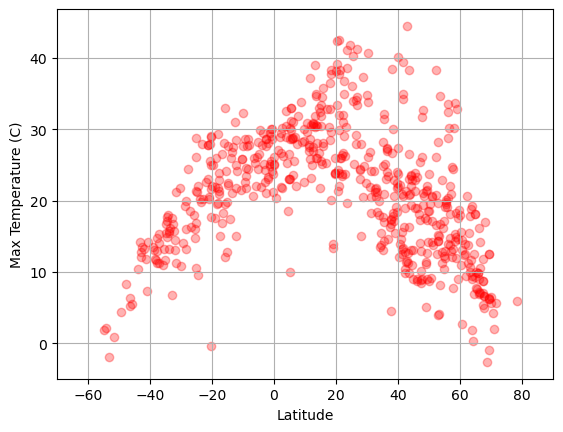

In [19]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, alpha=0.3, marker="o", color="red")

# Incorporate the other graph properties
plt.title = "City Max Latitude vs Temperature"
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.xlim(-70,90)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

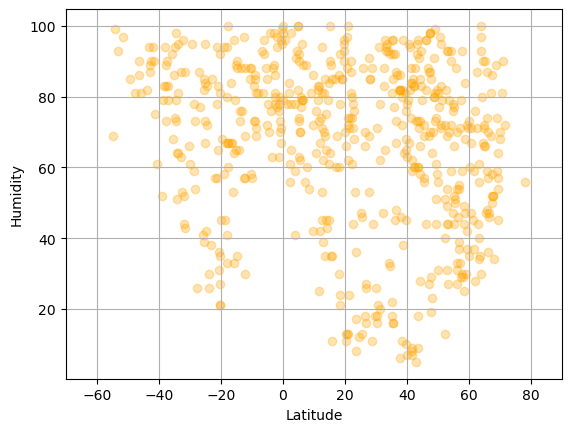

In [20]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, alpha=0.3, marker="o", color="orange")

# Incorporate the other graph properties
#plt.title("City Max Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.xlim(-70,90)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

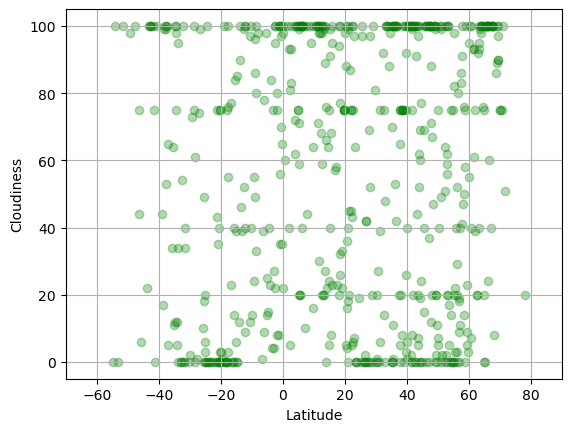

In [21]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, alpha=0.3, marker="o", color="green")

# Incorporate the other graph properties
#plt.title("City Max Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.xlim(-70,90)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

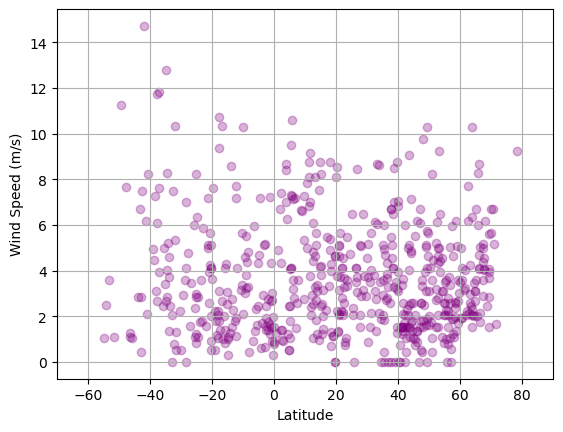

In [22]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, alpha=0.3, marker="o", color="purple")

# Incorporate the other graph properties
#plt.title("City Max Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.xlim(-70,90)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def myfunc(x_values, y_values, title, text_coordinates):
    slope, intercept, r, p, std_err = linregress(x_values, y_values)

#The formula for simple linear regression is Y = mX + b, 
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {r**2}")
    plt.show()


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,la passe,45.5549,-0.8967,23.91,69,69,5.51,FR,1686209569
3,hadibu,12.6500,54.0333,30.73,71,59,4.80,YE,1686209569
4,udachny,66.4167,112.4000,14.14,47,60,2.13,RU,1686209570
5,novoaltaysk,53.3917,83.9363,34.67,27,100,3.94,RU,1686209570
7,tiksi,71.6872,128.8694,5.62,72,51,1.64,RU,1686209570


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taiobeiras,-15.8078,-42.2331,12.06,96,0,0.84,BR,1686209569
2,grytviken,-54.2811,-36.5092,2.08,99,100,2.51,GS,1686209569
6,port-aux-francais,-49.3500,70.2167,4.35,85,98,11.24,TF,1686209570
8,blackmans bay,-43.0167,147.3167,12.07,89,100,2.85,AU,1686209570
12,adamstown,-25.0660,-130.1015,21.32,67,6,2.96,PN,1686209570


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4404014706646848


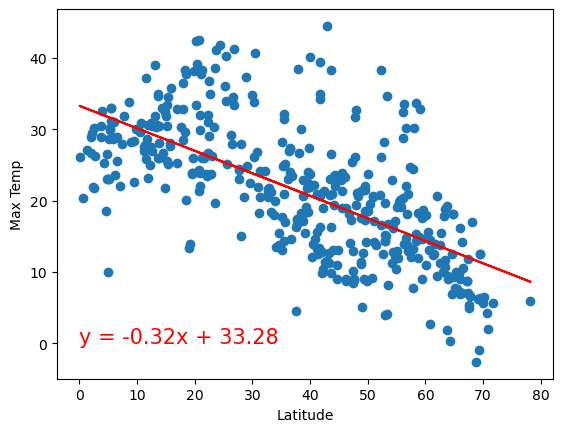

In [41]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

myfunc(x_values, y_values, "Max Temp",(0,0))
#(6,-10)

The r-value is: 0.6341372167074995


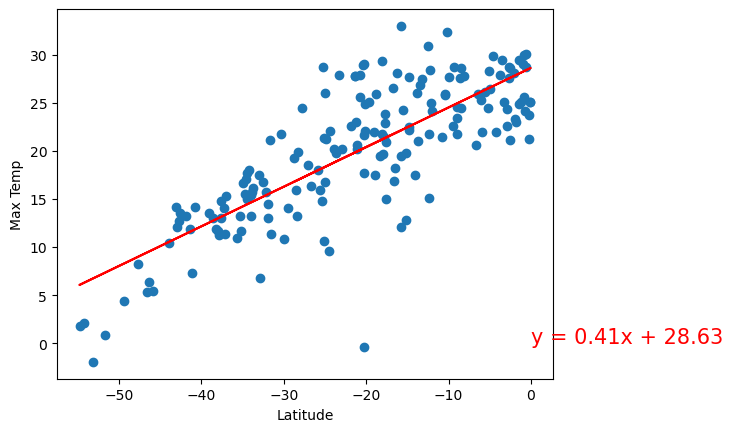

In [51]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

myfunc(x_values, y_values, "Max Temp",(-20,5))
# YOUR CODE HERE -55,35

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.011995410178312994


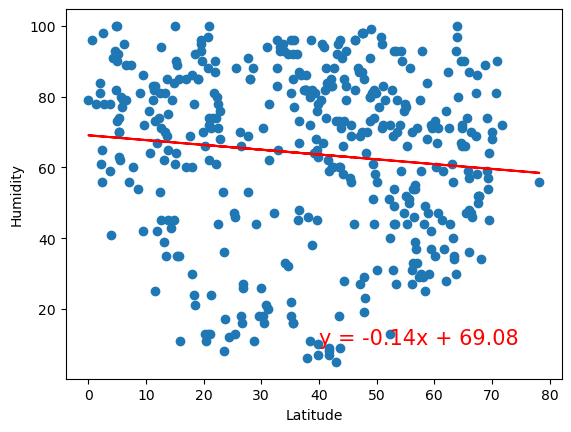

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

myfunc(x_values, y_values, "Humidity",(40,10))
# YOUR CODE HERE 40,10

The r-value is: 1.4626205374736763e-06


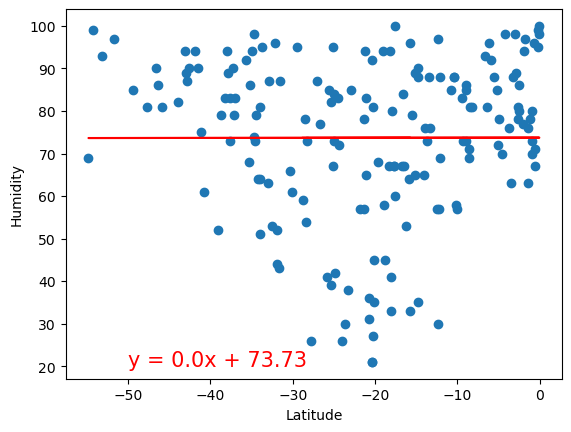

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

myfunc(x_values, y_values, "Humidity",(-50,20))
# YOUR CODE HERE -50,20

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0008902301500740758


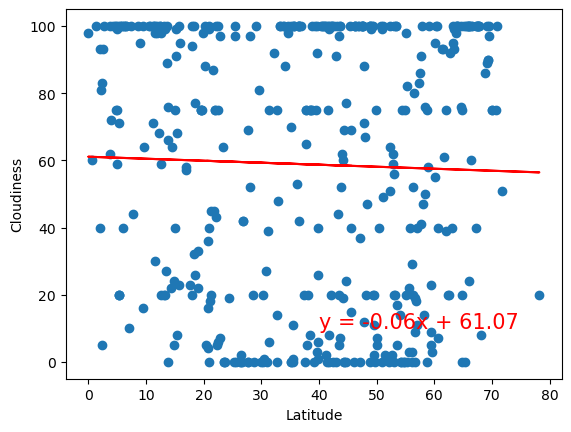

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

myfunc(x_values, y_values, "Cloudiness",(40,10))
# YOUR CODE HERE 40,10

The r-value is: 0.00012969844776508394


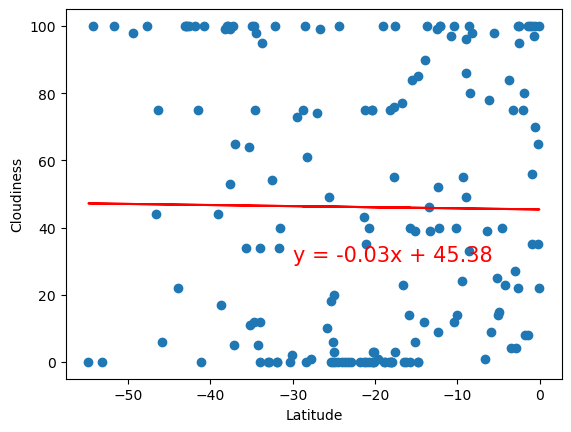

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

myfunc(x_values, y_values, "Cloudiness",(-30,30))
# YOUR CODE HERE -30,30

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008118283667369388


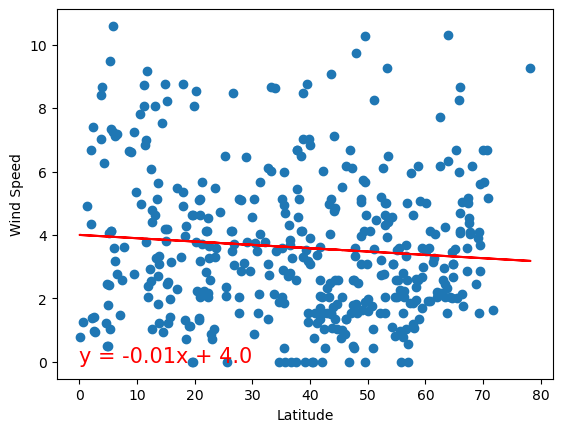

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

myfunc(x_values, y_values, "Wind Speed",(0,0))
# YOUR CODE HERE 10,12

The r-value is: 0.05122113246761489


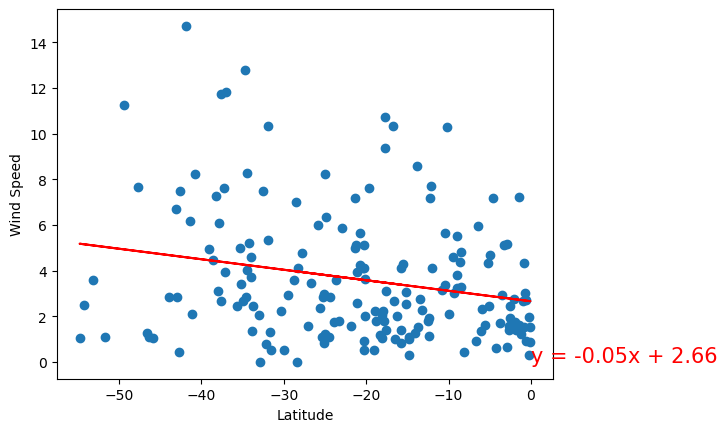

In [57]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

myfunc(x_values, y_values, "Wind Speed",(0,0))
# YOUR CODE HERE -50,12

**Discussion about the linear relationship:** YOUR RESPONSE HERE